# Functionality to add
- Databunch
- Learner
- Fit one cycle
- Show batch

In [84]:
using Metalhead
using FileIO
using Images
using Serialization
using Random
using Flux
using Flux.Data: DataLoader
using Flux.Optimise: Optimiser, WeightDecay
using Flux: onehotbatch, onecold, logitcrossentropy
using Statistics, Random
import ProgressMeter
using Parameters: @with_kw
import MLDatasets
import DrWatson: savename, struct2dict
import BSON
using CUDAapi
using Plots
import GR
using Images
using CuArrays
using ImageView
gr()

ERROR: ERROR: LoadError: LoadError: InterruptException:
Stacktrace:InterruptException:
Stacktrace:
 [1] _include_from_serialized(
 [1] ::poptaskref(String, ::Array{Any,1}) at ./loading.jl:681
 [2] _require_search_from_serialized(::Base.PkgId, ::String) at ./loading.jl:781
 [3] _tryrequire_from_serialized(::Base.PkgId, ::UInt64, ::String) at ./loading.jl:712
 [4] _require_search_from_serialized(::Base.PkgId, ::String) at ./loading.jl:770
 [5] _require(::Base.PkgId) at ./loading.jl:1006
 [6] require(::Base.PkgId) at ./loading.jl:927
 [7] require(::Module, ::Symbol) at ./loading.jl:922
 [8] include(::Module, ::String) at ./Base.jl:377
 [9] top-level scope at none:2
 [10] eval at ./boot.jl:331 [inlined]
 [11] eval(::Expr) at ./client.jl:449
 [12] top-level scope at ./none:3
in expression starting at /home/subhaditya/.julia/packages/Flux/Fj3bt/src/Flux.jl:6
::Base.InvasiveLinkedListSynchronized{Task}) at ./task.jl:702
 [2] wait at ./task.jl:709 [inlined]
 [3] wait(::Base.GenericCondition{Ba

InterruptException: InterruptException:

# ImageList -> Playground

## From folder

In [38]:

path = "/media/subhaditya/DATA/COSMO/Datasets/catDog/"

categories = readdir(path)


imageSize = 64

InterruptException: InterruptException:

In [39]:
@time test_folder = readdir(joinpath(path,"cat"))

  0.005223 seconds (12.52 k allocations: 696.953 KiB)


12502-element Array{String,1}:
 "1.jpg"
 "10.jpg"
 "100.jpg"
 "1000.jpg"
 "10000.jpg"
 "10001.jpg"
 "10002.jpg"
 "10003.jpg"
 "10004.jpg"
 "10005.jpg"
 "10006.jpg"
 "10007.jpg"
 "10008.jpg"
 ⋮
 "999.jpg"
 "9990.jpg"
 "9991.jpg"
 "9992.jpg"
 "9993.jpg"
 "9994.jpg"
 "9995.jpg"
 "9996.jpg"
 "9997.jpg"
 "9998.jpg"
 "9999.jpg"
 "models"

In [40]:

images =zeros((imageSize, imageSize, 3, size(test_folder, 1)));
file_name = joinpath(path, "cat", "9998.jpg")
img = channelview(imresize(load(file_name), (imageSize, imageSize)))


3×64×64 reinterpret(N0f8, ::Array{RGB{N0f8},3}):
[:, :, 1] =
 0.51   0.204  0.384  0.345  0.667  …  0.047  0.133  0.086  0.141  0.224
 0.518  0.212  0.416  0.376  0.698     0.047  0.129  0.055  0.153  0.212
 0.569  0.263  0.467  0.427  0.749     0.027  0.051  0.051  0.063  0.259

[:, :, 2] =
 0.592  0.247  0.431  0.655  0.659  …  0.176  0.094  0.137  0.055  0.2
 0.6    0.255  0.463  0.686  0.69      0.173  0.075  0.129  0.047  0.196
 0.651  0.302  0.514  0.737  0.741     0.118  0.082  0.043  0.059  0.133

[:, :, 3] =
 0.604  0.69   0.557  0.247  0.588  …  0.384  0.42   0.051  0.204  0.114
 0.612  0.698  0.588  0.278  0.62      0.376  0.404  0.051  0.196  0.114
 0.659  0.745  0.639  0.329  0.671     0.294  0.373  0.008  0.184  0.031

...

[:, :, 62] =
 0.22   0.365  0.137  0.6    0.318  …  0.275  0.078  0.075  0.059  0.522
 0.278  0.373  0.157  0.612  0.349     0.255  0.094  0.082  0.059  0.502
 0.439  0.439  0.173  0.639  0.4       0.208  0.043  0.082  0.031  0.392

[:, :, 63] =
 0.027

In [41]:
size(permutedims(img,(2,3,1)))

(64, 64, 3)

In [42]:
@time images[:,:,:,1] = permutedims(img,(2,3,1))

  0.049365 seconds (116.22 k allocations: 5.776 MiB)


64×64×3 Array{N0f8,3} with eltype Normed{UInt8,8}:
[:, :, 1] =
 0.51   0.592  0.604  0.682  0.518  …  0.627  0.588  0.22   0.027  0.376
 0.204  0.247  0.69   0.345  0.176     0.604  0.243  0.365  0.329  0.282
 0.384  0.431  0.557  0.604  0.71      0.098  0.027  0.137  0.047  0.22
 0.345  0.655  0.247  0.69   0.188     0.373  0.165  0.6    0.584  0.188
 0.667  0.659  0.588  0.706  0.722     0.525  0.545  0.318  0.643  0.357
 0.49   0.51   0.784  0.486  0.318  …  0.714  0.42   0.247  0.408  0.392
 0.314  0.525  0.769  0.235  0.757     0.612  0.369  0.675  0.608  0.471
 0.216  0.294  0.757  0.753  0.757     0.29   0.224  0.251  0.529  0.208
 0.82   0.325  0.392  0.396  0.522     0.702  0.565  0.255  0.62   0.392
 0.592  0.741  0.851  0.851  0.749     0.141  0.294  0.322  0.588  0.612
 0.208  0.725  0.824  0.514  0.51   …  0.18   0.255  0.757  0.243  0.651
 0.345  0.596  0.678  0.416  0.671     0.149  0.286  0.651  0.706  0.471
 0.671  0.498  0.584  0.792  0.859     0.141  0.725  0.498  0.

In [43]:

Threads.nthreads() = 8

function add_path(cat::String)
    temp_dir = readdir(joinpath(path,cat));
    return [joinpath(path, cat,x) for x in temp_dir],fill(cat,size(temp_dir,1) )
end

add_path (generic function with 1 method)

In [44]:

total_files = collect(Iterators.flatten([add_path(x)[1] for x in categories]));
total_categories = collect(Iterators.flatten([add_path(x)[2] for x in categories]));

In [45]:

images = zeros((imageSize, imageSize, 3, size(total_files,1)));

@time Threads.@threads for idx in 1:size(total_files,1)
    img = channelview(imresize(load(total_files[idx]), (imageSize, imageSize)))
    images[:,:,:,idx] = permutedims(img,(2,3,1))
    end

Error encountered while loading "/media/subhaditya/DATA/COSMO/Datasets/catDog/cat/10991.jpg".

Fatal error:


TaskFailedException: TaskFailedException:
InterruptException:
Stacktrace:
 [1] handle_error(::InterruptException, ::File{DataFormat{:JPEG}}) at /home/subhaditya/.julia/packages/FileIO/ZknoK/src/error_handling.jl:82
 [2] handle_exceptions(::Array{Any,1}, ::String) at /home/subhaditya/.julia/packages/FileIO/ZknoK/src/error_handling.jl:77
 [3] load(::FileIO.Formatted; options::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /home/subhaditya/.julia/packages/FileIO/ZknoK/src/loadsave.jl:186
 [4] load at /home/subhaditya/.julia/packages/FileIO/ZknoK/src/loadsave.jl:166 [inlined]
 [5] #load#13 at /home/subhaditya/.julia/packages/FileIO/ZknoK/src/loadsave.jl:118 [inlined]
 [6] load(::String) at /home/subhaditya/.julia/packages/FileIO/ZknoK/src/loadsave.jl:118
 [7] macro expansion at ./In[45]:5 [inlined]
 [8] (::var"#398#threadsfor_fun#23"{UnitRange{Int64}})(::Bool) at ./threadingconstructs.jl:61
 [9] (::var"#398#threadsfor_fun#23"{UnitRange{Int64}})() at ./threadingconstructs.jl:28

In [46]:

size(images,4) == size(total_categories,1)

true

In [47]:
mb_idxs = Base.Iterators.partition(1:length(X), 64)

InterruptException: InterruptException:

## 

# ImageList -> Main

In [48]:
#export
using FileIO
using Images
using Serialization
using Random
using CUDAapi
using Plots
import GR
using Images
using CuArrays
using ImageView
using Statistics, Random
import ProgressMeter
using Distributions
using Zygote
gr()

InterruptException: InterruptException:

## fromFolder

In [49]:
#export
# Helper function to add path to array
function add_path(cat::String)
    temp_dir = readdir(joinpath(path,cat));
    return [joinpath(path, cat,x) for x in temp_dir],fill(cat,size(temp_dir,1) )
end

add_path (generic function with 1 method)

## Class Distribution

In [50]:
#export
function classDistribution(y)
    """
    Function to plot class distribution to see if balanced or not.
    """
    labels = unique(y)
    cnts = [sum(y .== i) for i in labels]
    display(plot(cnts,seriestype = [:bar]))
    return cnts,maximum(cnts)
end

classDistribution (generic function with 1 method)

In [51]:
#export
path = "/media/subhaditya/DATA/COSMO/Datasets/catDog/"

"/media/subhaditya/DATA/COSMO/Datasets/catDog/"

In [52]:
#export
# Define number of threads
Threads.nthreads() = length(Sys.cpu_info())

InterruptException: InterruptException:

In [53]:
collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [54]:
#export

"""
Function to create an array of images and labels -> when the directory structure is as follows
- main
    - category1
        - file1...
    -category2
        - file1...
    ...
"""
function fromFolder(path::String,imageSize=64::Int64)
    @info path, imageSize
    categories = readdir(path)
    total_files = collect(Iterators.flatten([add_path(x)[1] for x in categories]));
    total_categories = collect(Iterators.flatten([add_path(x)[2] for x in categories]));
    distrib,max_dis = classDistribution(total_categories)
    
    indices_repeat = indexin(unique(total_categories), total_categories)
    # oversample
    total_add = max_dis.-distrib # get the differences to oversample
    oversample = false;
    if sum(total_add)>100
        @info "Oversampling"
        images = zeros((imageSize, imageSize, 3, size(max_dis*length(unique(total_categories)),1)));
        oversample= true;
        oversample_index = length(y)- sum(total_add)# keep a track of indices from the back
    else
        @info "No need to oversample"
        images = zeros((imageSize, imageSize, 3, size(total_categories,1)));
        oversample= false;
    end
    
    Threads.@threads for idx in collect(1:size(total_files,1))
        img = channelview(imresize(load(total_files[idx]), (imageSize, imageSize)))
        img = convert(Array{Float64},img)
        images[:,:,:,idx] = permutedims(img,(2,3,1))
#         @info oversample
        if oversample==true
            
            if idx in indices_repeat
                labelrep = findfirst(x->x==idx,indices_repeat) # index in the repeated list
                to_repeat = total_add[labelrep] # no of times to repeat
                total_categories = vcat(total_categories, fill(total_categories[indices_repeat[labelrep]],to_repeat))
                Threads.@threads for idx2 in collect(oversample_index:to_repeat)
                    images[:,:,:,idx2] = images[:,:,:,indices_repeat[labelrep] ]
                    
                end
                
                
            end
        end
    end
            
      
    @info "Done loading images"
    
    return images, total_categories
    
    
    
end
    

fromFolder

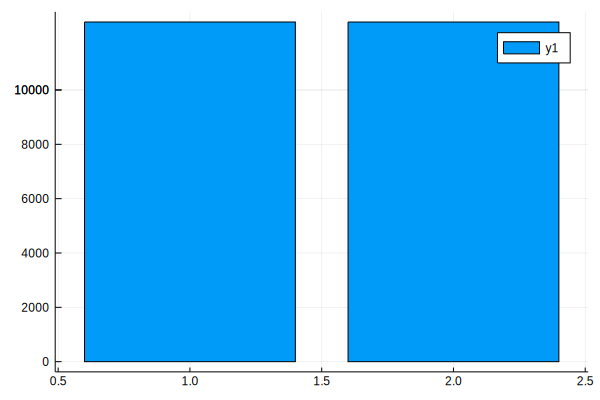

┌ Info: ("/media/subhaditya/DATA/COSMO/Datasets/catDog/", 64)
└ @ Main In[54]:13
┌ Info: No need to oversample
└ @ Main In[54]:29
┌ Info: Done loading images
└ @ Main In[54]:56


In [87]:
#export
X,y = fromFolder(path,64);

In [88]:
size(X),size(y)

((64, 64, 3, 25003), (25003,))

## Splitting

In [89]:
at = 0.7
n = length(y)
idx = shuffle(1:n)
train_idx = view(idx, 1:floor(Int, at*n));
test_idx = view(idx, (floor(Int, at*n)+1):n);

In [90]:
ytrain,ytest = y[train_idx,:], y[test_idx,:]
Xtrain,Xtest = X[:,:,:,train_idx], X[:,:,:,test_idx]
@info length(ytrain),length(ytest)
@info length(Xtrain),length(Xtest)

┌ Info: (17502, 7501)
└ @ Main In[90]:3
┌ Info: (215064576, 92172288)
└ @ Main In[90]:4


In [91]:
#export
function splitter(pct_split=0.7::Float16)
    """
    Splits into train/test by pct_split%
    """
    n = length(y)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, pct_split*n));
    test_idx = view(idx, (floor(Int, pct_split*n)+1):n);
    ytrain,ytest = y[train_idx,:], y[test_idx,:]
    Xtrain,Xtest = X[:,:,:,train_idx], X[:,:,:,test_idx]
    return Xtrain, ytrain, Xtest, ytest
end

splitter (generic function with 2 methods)

In [92]:
#export
Xtrain, ytrain, Xtest, ytest = splitter(.8);

## Linear 

In [93]:
using Zygote

In [94]:
W = rand(2,5)
b = rand(2)

2-element Array{Float64,1}:
 0.5764458955807203
 0.08567222423924625

In [95]:
Dense(x) = W*x.+b

Dense (generic function with 1 method)

In [96]:
function loss(x,y)
    ŷ = Dense(x)
    sum((y-ŷ).^2)
end

loss (generic function with 1 method)

In [97]:
x,y = rand(5),rand(2)
# loss(x,y)

([0.12301556361508892, 0.7539684756859879, 0.8821190914744803, 0.29043588305977974, 0.4111351570083821], [0.376111351493311, 0.2575111728758481])

In [98]:
α = 0.1

0.1

In [99]:
x,y = rand(100),rand(2)
W = rand(2,100)
b = rand(2)

2-element Array{Float64,1}:
 0.6031506660494295
 0.4146788453975747

In [100]:
W = zeros(2,100)

2×100 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [101]:
for a in collect(1:50)
    gs = gradient(() -> loss(x, y), Params([W, b]))
    W̄ = gs[W]
    W.= α.*W̄
    ŷ =  W*x.+b
    @info sum((y-ŷ).^2)
end

┌ Info: 7.461649267405814
└ @ Main In[101]:6
┌ Info: 373.97444891631585
└ @ Main In[101]:6
┌ Info: 18176.089538877266
└ @ Main In[101]:6
┌ Info: 879552.2853621729
└ @ Main In[101]:6
┌ Info: 4.253539574742735e7
└ @ Main In[101]:6
┌ Info: 2.0568382116483445e9
└ @ Main In[101]:6
┌ Info: 9.945901515605614e10
└ @ Main In[101]:6
┌ Info: 4.80936088867003e12
└ @ Main In[101]:6
┌ Info: 2.3255756070519138e14
└ @ Main In[101]:6
┌ Info: 1.1245364656021288e16
└ @ Main In[101]:6
┌ Info: 5.437717232762797e17
└ @ Main In[101]:6
┌ Info: 2.6294183945445974e19
└ @ Main In[101]:6
┌ Info: 1.2714602096482638e21
└ @ Main In[101]:6
┌ Info: 6.1481697551299495e22
└ @ Main In[101]:6
┌ Info: 2.972959047476757e24
└ @ Main In[101]:6
┌ Info: 1.4375799384192644e26
└ @ Main In[101]:6
┌ Info: 6.951444827669094e27
└ @ Main In[101]:6
┌ Info: 3.361384219458547e29
└ @ Main In[101]:6
┌ Info: 1.6254036608118488e31
└ @ Main In[101]:6
┌ Info: 7.859669969552376e32
└ @ Main In[101]:6
┌ Info: 3.8005581948442667e34
└ @ Main In[101

# Initialization
- Zero Initialization: set all weights to 0
- Normal Initialization: set all weights to random small numbers
- Lecun Initialization: normalize variance
- Xavier Intialization (glorot init)
- Kaiming Initialization (he init)

## Lecun
It draws samples from a truncated normal distribution centered on 0 with stddev <- sqrt(1 / fan_in) where fan_in is the number of input units in the weight tensor..

In [102]:
using Distributions

In [103]:
#export
lecun_normal(fan_in) = return Distributions.Normal(0, sqrt(1/fan_in))

lecun_normal (generic function with 1 method)

In [104]:
W = rand(lecun_normal(2), 2, 100)
b = rand(lecun_normal(2), 2)

2-element Array{Float64,1}:
  0.940000461492082
 -0.02009758485773298

## Xavier Normal
It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.

In [105]:
#export
xavier_normal(fan_in,fan_out) = return Distributions.Normal(0, sqrt(2/(fan_in+fan_out)))

xavier_normal (generic function with 1 method)

In [106]:
W = rand(xavier_normal(2,100), 2, 100)
b = rand(xavier_normal(2,2), 2)

2-element Array{Float64,1}:
 -1.0109359937781766
  0.20342110323523546

# Xavier Uniform
It draws samples from a uniform distribution within -limit, limit where limit is sqrt(6 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.

In [107]:
#export
function xavier_uniform(fan_in,fan_out)
    limit = sqrt(6/(fan_in+fan_out))
    return Distributions.Uniform(-limit, limit)
end

xavier_uniform (generic function with 1 method)

In [108]:
W = rand(xavier_uniform(2,100), 2, 100)
b = rand(xavier_uniform(2,2), 2)

2-element Array{Float64,1}:
 -0.05047299788861537
  1.019156066359661

## He Normal
It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.

In [109]:
#export
he_normal(fan_in) = return Distributions.Normal(0, sqrt(2/(fan_in)))

he_normal (generic function with 1 method)

In [110]:
W = rand(he_normal(2), 2, 100)
b = rand(he_normal(2), 2)

2-element Array{Float64,1}:
 0.8717973634999604
 1.578166079550752

# He Uniform
It draws samples from a uniform distribution within -limit, limit where limit is sqrt(6 / fan_in) where fan_in is the number of input units in the weight tensor.

In [111]:
#export
function he_uniform(fan_in)
    limit = sqrt(6/(fan_in))
    return Distributions.Uniform(-limit, limit)
end

he_uniform (generic function with 1 method)

In [112]:
W = rand(he_uniform(2), 2, 100)
b = rand(he_uniform(2), 2)

2-element Array{Float64,1}:
 -1.3631828338625294
  0.7671381540574544

# Batching

## One hot

In [115]:
ytrain

20002×1 Array{String,2}:
 "dog"
 "dog"
 "cat"
 "cat"
 "dog"
 "cat"
 "cat"
 "cat"
 "dog"
 "cat"
 "dog"
 "cat"
 "cat"
 ⋮
 "dog"
 "dog"
 "dog"
 "dog"
 "cat"
 "cat"
 "dog"
 "cat"
 "cat"
 "dog"
 "dog"
 "dog"

In [119]:
labels = unique(ytrain);
encodedlabels = Dict(labels .=> collect(1:length(labels)))

Dict{String,Int64} with 2 entries:
  "cat" => 2
  "dog" => 1

In [123]:
map(ytrain, encodedlabels) 

ErrorException: map is not defined on dictionaries

In [82]:
function onecold(y_enc)
    labels = unique(y_enc)
    encodedlabels = Dict(labels .=> collect(1:length(labels)))
    return map(labels, encodedlabels), encodedlabels
end

onecold (generic function with 1 method)

In [83]:
onecold(ytrain)

ErrorException: map is not defined on dictionaries